In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist(".", kind="train")
# X_test, y_test =load_mnist(".", kind='t10k')

In [7]:
X_train.shape

(60000, 784)

In [4]:
xc = X_train - X_train.mean(axis=0)

In [5]:
xcov = xc.T.dot(xc)

In [6]:
xcov.shape

(784, 784)

In [7]:
trace(xcov)

266145742269.89587

In [8]:
s = svd(xcov, compute_uv=False)

In [9]:
s.shape

(784,)

In [10]:
s.sum()

266145742269.89581

The same as trace(xcov)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=784)
pca = pca.fit(X_train)

In [13]:
pca.explained_variance_ratio_.sum()

0.99999999999999989

In [15]:
pca.singular_values_.sum()

6656111.7003364293

In [16]:
(pca.singular_values_ ** 2).sum()

266145742269.89575

The same as trace(xcov)

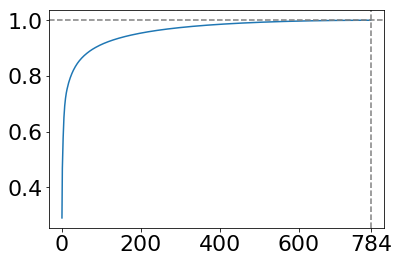

In [39]:
rcParams["font.size"] = 22
plot([s[:e].sum() / trace(xcov) for e in range(1, 784)])
axhline(1, linestyle="--", color="gray")
axvline(784, linestyle="--", color="gray")
xlim(-32, 784+32)
xticks([0, 200, 400, 600, 784])
savefig("pca_variance.png", dpi=150, transparent=True, bbox="tight")

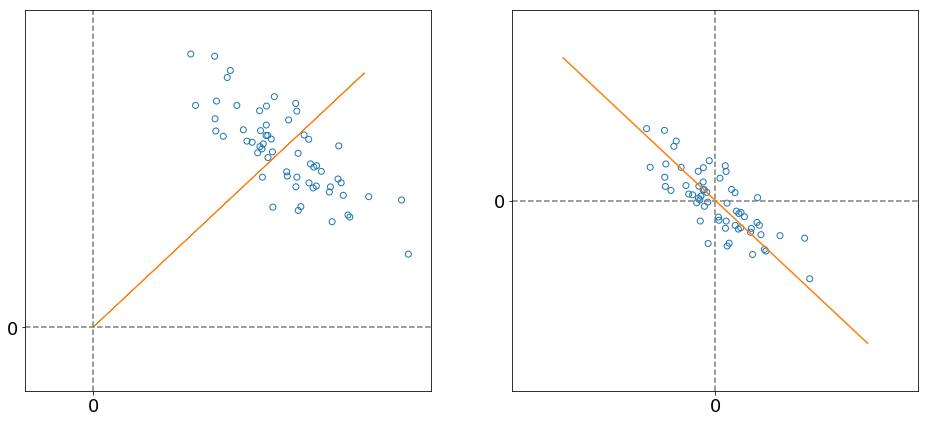

In [111]:
rcParams["font.size"] = 18
f, (ax1, ax2) = subplots(1, 2)
f.set_size_inches(16, 7)
ax1.set_xlim(-0.25, 1.25)
ax2.set_xlim(-1, 1)
ax1.set_ylim(-0.25, 1.25)
ax2.set_ylim(-1, 1)
numpy.random.seed(777)
dots = numpy.random.normal(loc=0, scale=0.25, size=(60, 2))
dots[:, 1] /= 3
dots = dots.dot(array([[cos(pi/4), -sin(pi/4)], [sin(pi/4), cos(pi/4)]]))
d1 = dots + array([0.7, 0.7])
ax1.scatter(d1[:, 0], d1[:, 1], facecolors="none", edgecolors="C0")
ax1.arrow(0, 0, 1, 1, color="C1")
ax1.set_xticks([0])
ax1.set_yticks([0])
ax2.set_xticks([0])
ax2.set_yticks([0])
ax1.axhline(0, linestyle="--", color="gray")
ax1.axvline(0, linestyle="--", color="gray")
ax2.scatter(dots[:, 0], dots[:, 1], facecolors="none", edgecolors="C0")
ax2.axhline(0, linestyle="--", color="gray")
ax2.axvline(0, linestyle="--", color="gray")
ax2.plot([-0.75, 0.75], [0.75, -0.75], color="C1")
savefig("pca_offset.png", dpi=150, transparent=True, bbox="tight")

In [113]:
PCA(n_components=1).fit(dots).components_

array([[ 0.72331985, -0.69051314]])

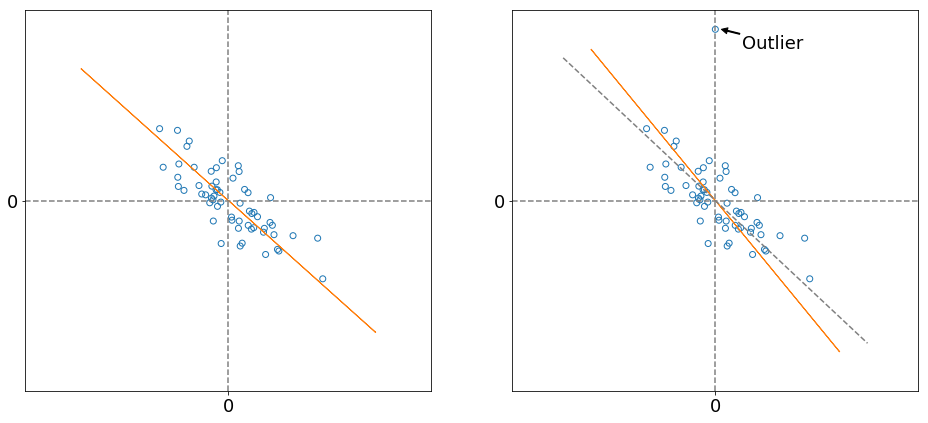

In [146]:
rcParams["font.size"] = 18
f, (ax1, ax2) = subplots(1, 2)
f.set_size_inches(16, 7)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax1.scatter(dots[:, 0], dots[:, 1], facecolors="none", edgecolors="C0")
c = PCA(n_components=1).fit(dots).components_
ax1.arrow(0, 0, c[0, 0], c[0, 1], color="C1")
ax1.arrow(0, 0, -c[0, 0], -c[0, 1], color="C1")
ax1.set_xticks([0])
ax1.set_yticks([0])
ax2.set_xticks([0])
ax2.set_yticks([0])
ax1.axhline(0, linestyle="--", color="gray")
ax1.axvline(0, linestyle="--", color="gray")
dots2 = dots.copy()
dots2[0] = 0, 0.9
c = PCA(n_components=1).fit(dots2).components_
ax2.arrow(0, 0, c[0, 0], c[0, 1], color="C1")
ax2.arrow(0, 0, -c[0, 0], -c[0, 1], color="C1")
ax2.scatter(dots2[:, 0], dots2[:, 1], facecolors="none", edgecolors="C0")
ax2.axhline(0, linestyle="--", color="gray")
ax2.axvline(0, linestyle="--", color="gray")
ax2.plot([-0.75, 0.75], [0.75, -0.75], color="gray", linestyle="--")
ax2.annotate("Outlier", xy=(0.03, 0.9), xytext=(0.13, 0.8), arrowprops=dict(
    facecolor="black", width=1, headlength=6, headwidth=6))
savefig("pca_outlier.png", dpi=150, transparent=True, bbox="tight")